# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importar numpy e pandas **

In [2]:
import numpy as np
import pandas as pd

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

** Leia o arquivo csv como um dataframe chamado df **

In [4]:
df = pd.read_csv('911.csv')

** Verifique a info() do df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verifique o cabeçalho do df **

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [7]:
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
df.groupby('zip').size().sort_values()

zip
17752.0       1
19490.0       1
19457.0       1
19139.0       1
19127.0       1
           ... 
19406.0    3174
19446.0    4748
19403.0    4854
19464.0    6643
19401.0    6979
Length: 104, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [9]:
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [10]:
df['title'].nunique()

110

110

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [11]:
# Function to test each value in title column and return the fisrt part of the string
def split_name(title):
    
    split_title = title.split(':')
    return split_title[0].strip()

In [12]:
# Create a new column using method apply and the function split_name()
df['reason'] = df['title'].apply(split_name)

** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

In [13]:
# Method value_counts applied to new column to see the reason of people call 911.
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

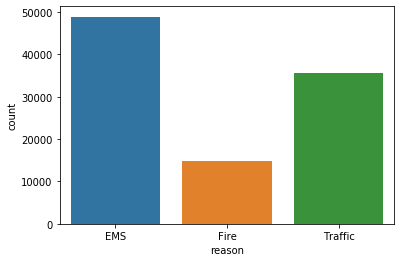

In [14]:
sns.countplot(x=df['reason'])

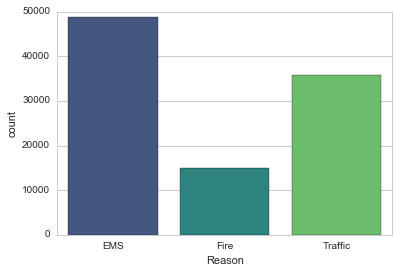

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [15]:
type(df['timeStamp'][0])
  

str

str

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
time = df['timeStamp'].iloc[0]


3

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [49]:
def return_hour(x):
    
    
    hour = x.hour
    return hour

def return_month(x):
    
    month = x.month
    return month
    
    
    
def return_dayofweek(x):
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    dayofweek = dmap[x.dayofweek]
    return dayofweek
    

In [50]:
df['hour'] = df['timeStamp'].apply(return_hour)
df['month'] = df['timeStamp'].apply(return_month)
df['Day of Week'] = df['timeStamp'].apply(return_dayofweek)

** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

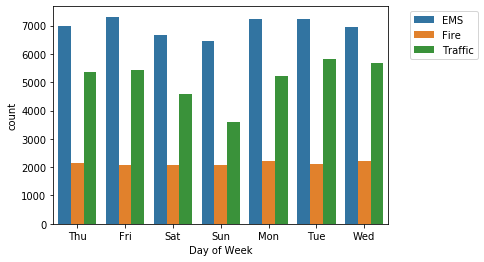

In [57]:
ax = sns.countplot(x=df['Day of Week'],hue = df['reason'])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

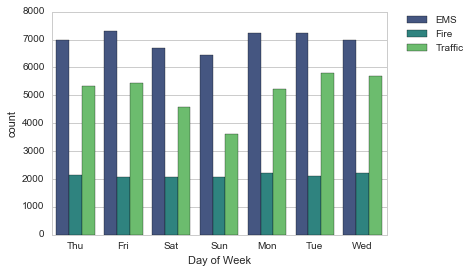

** Agora faça o mesmo para o mês: **

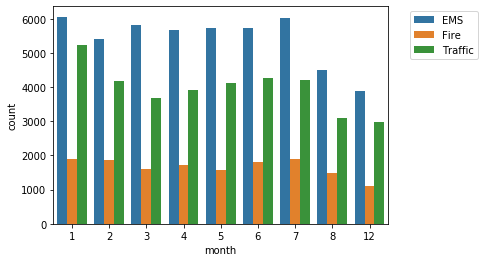

In [59]:
ax = sns.countplot(x=df['month'],hue = df['reason'])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

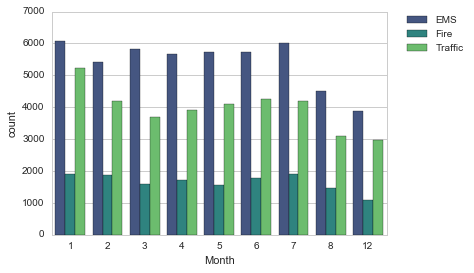

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [61]:
byMonth = df.groupby(by='month').count()

In [63]:
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Day of Week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

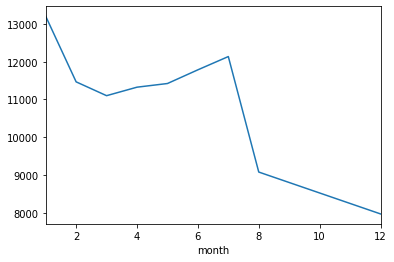

In [69]:
byMonth['reason'].plot()

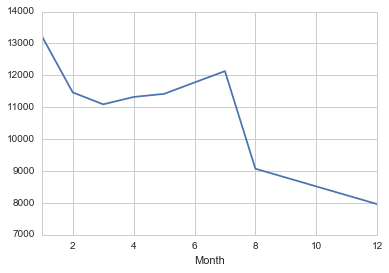

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

In [77]:
byMonth.reset_index(inplace=True)

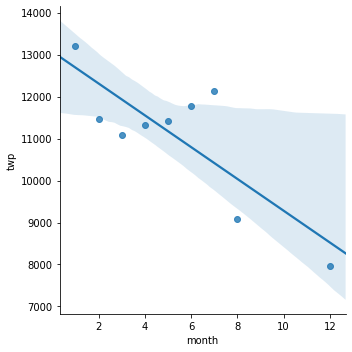

In [78]:
sns.lmplot(x='month', y='twp', data=byMonth)

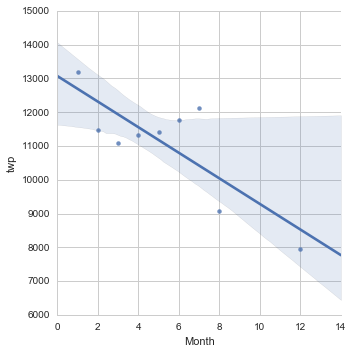

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [79]:
def return_date(x):
    
    date = x.date()
    return date

In [81]:
df['Data'] = df['timeStamp'].apply(return_date)

In [82]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,Day of Week,Data
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

In [100]:
ByDate = df.groupby(by='Data').count()

In [99]:
#ByDate.reset_index(inplace = True)

In [101]:
ByDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,Day of Week
Data,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


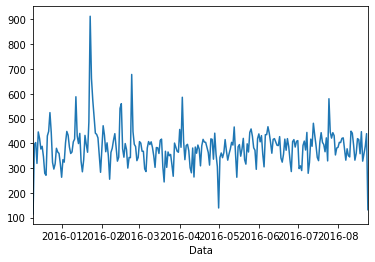

In [114]:
ByDate['twp'].plot()

Text(0.5, 1.0, 'Traffic')

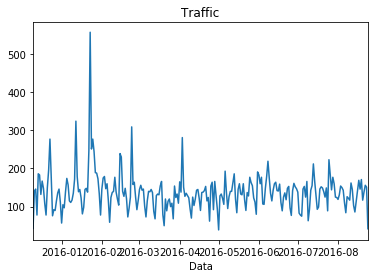

In [130]:
ax = df[df['reason']=='Traffic'].groupby('Data').count()['twp'].plot()
ax.set_title('Traffic')

Text(0.5, 1.0, 'Fire')

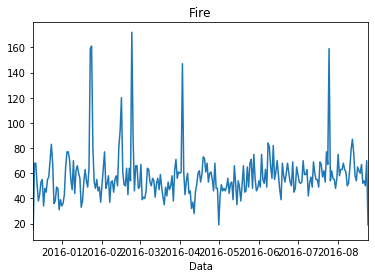

In [131]:
ax = df[df['reason']=='Fire'].groupby('Data').count()['twp'].plot()
ax.set_title('Fire')

Text(0.5, 1.0, 'EMS')

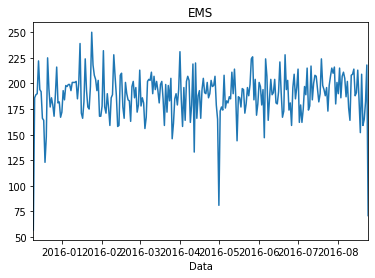

In [133]:
ax = df[df['reason']=='EMS'].groupby('Data').count()['twp'].plot()
ax.set_title('EMS')

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

259

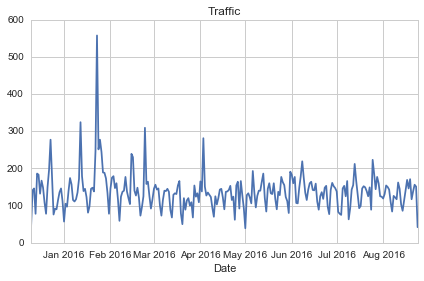

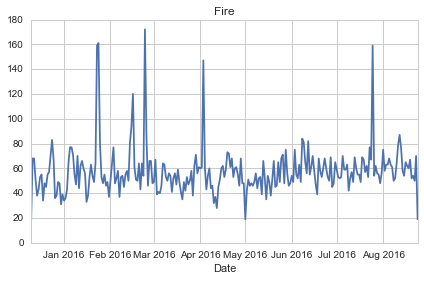

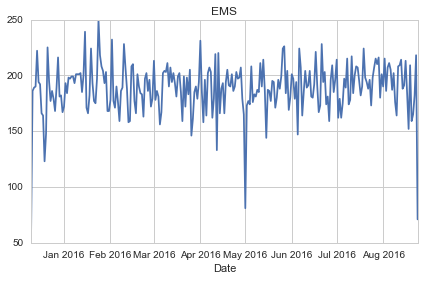

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [141]:
dayHour = df.groupby(by=['Day of Week','hour']).count()['reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Agora crie um mapa de calor usando este DataFrame **

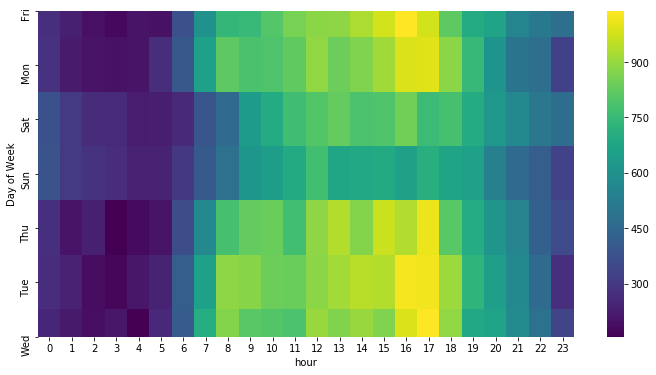

In [143]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

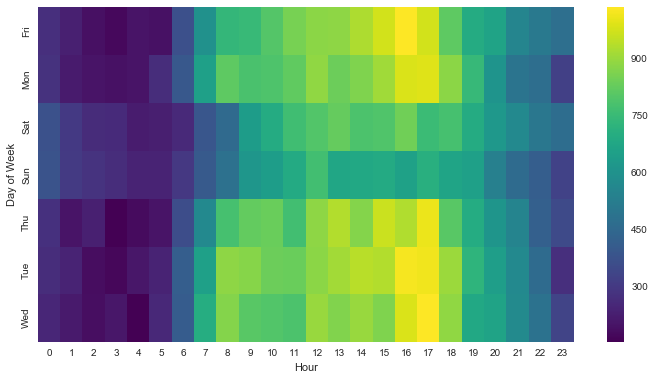

** Agora crie um clustermap usando este DataFrame. **

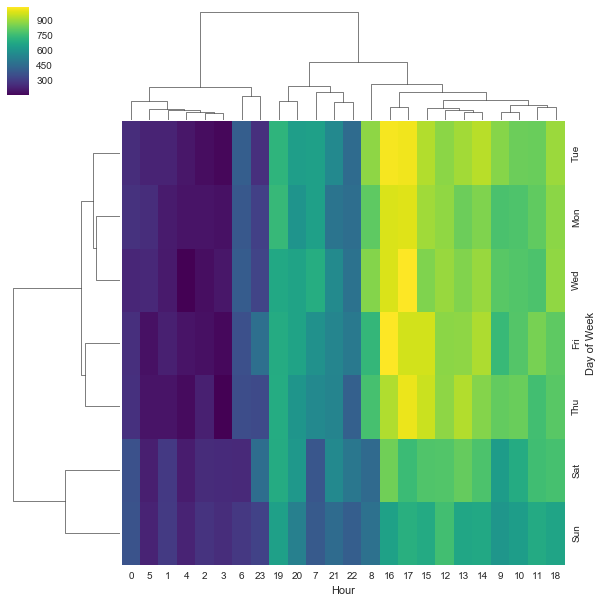

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [145]:
dayMonth = df.groupby(by=['Day of Week','month']).count()['reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


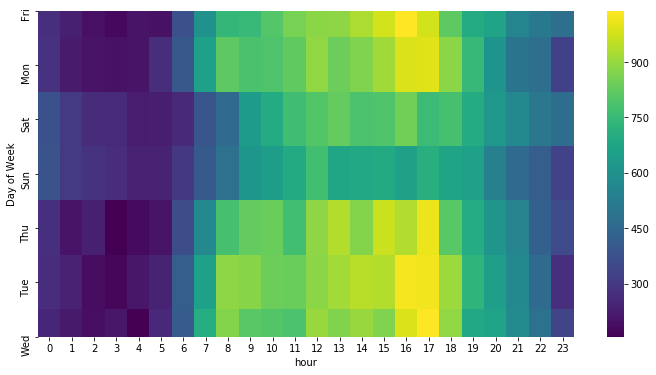

In [146]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

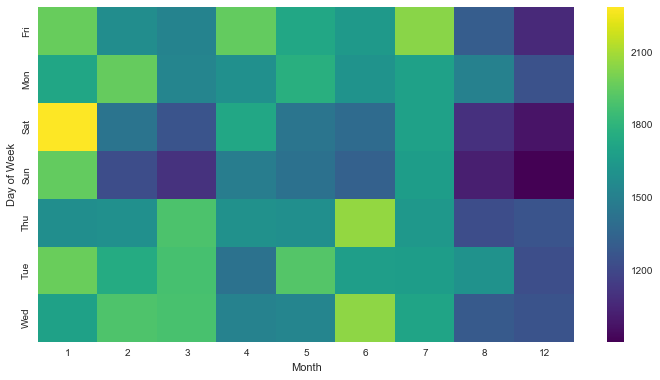

In [150]:
df.groupby(by='reason').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,month,Day of Week,Data
reason,,,,,,,,,,,,,
EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877,48877
Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920,14920
Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695,35695


In [155]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df




,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [163]:
grouped_animal = df.groupby('Animal')
grouped_animal.min()

,Max Speed
Animal,
Falcon,370.0
Parrot,24.0
